# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [2]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [3]:
data.shape

(10560, 11)

Visualizing available angles

In [4]:
data['alpha_deg'].unique()

array([  0,   5,  10,  15,  30,  45,  60,  70,  80,  90, 100, 110, 120,
       150, 180, 210, 240, 270, 300, 330], dtype=int64)

Creating reduced dataset by removing angles

In [5]:
removed_angles = [110]
data_removed = data[~data['alpha_deg'].isin(removed_angles)]

Input features and output variable selection

In [6]:
X = data_removed[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data_removed["CPL"].values*1000 #mev multiplication

Splitting of the data into train set and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [10]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [12]:
num_epochs = 500

Neural Network training

In [13]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
226/226 [==============================] - 5s 9ms/step - loss: 1.3695 - val_loss: 1.1491
Epoch 2/500
226/226 [==============================] - 2s 7ms/step - loss: 1.1535 - val_loss: 1.0697
Epoch 3/500
226/226 [==============================] - 2s 7ms/step - loss: 1.0448 - val_loss: 0.9832
Epoch 4/500
226/226 [==============================] - 1s 7ms/step - loss: 0.9940 - val_loss: 0.9306
Epoch 5/500
226/226 [==============================] - 2s 7ms/step - loss: 0.9570 - val_loss: 0.9112
Epoch 6/500
226/226 [==============================] - 3s 13ms/step - loss: 0.9261 - val_loss: 0.9664
Epoch 7/500
226/226 [==============================] - 3s 11ms/step - loss: 0.8855 - val_loss: 0.8394
Epoch 8/500
226/226 [==============================] - 2s 7ms/step - loss: 0.8602 - val_loss: 1.0531
Epoch 9/500
226/226 [==============================] - 2s 8ms/step - loss: 0.9441 - val_loss: 0.8545
Epoch 10/500
226/226 [==============================] - 3s 14ms/step - loss: 0.8400 - val

# Model Evaluation

In [14]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4837


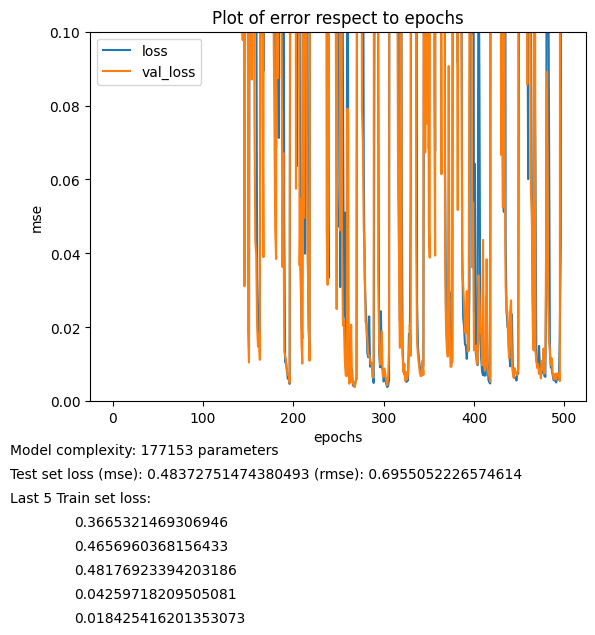

In [15]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [16]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [17]:
#model.predict(emp_test)

# Scatter plot

In [18]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [19]:
pred = predictions(X_test)

1/1 [==============================] - 0s 40ms/step


In [20]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.4837275512303793

In [21]:
for i in range(0,len(pred)):
    print(X_test[i],y_test[i],pred[i])

[0.99466458 1.63826959 1.10073669 0.28257382] -0.09899999999999999 -0.08753751218318939
[ 0.96299628  2.36907584 -1.17291009 -0.5982589 ] 0.5644699999999999 0.9396507143974304
[-0.59232409  0.62049093 -0.71854225 -0.20677769] 1.1852900000000002 1.1146408319473267
[ 0.9787191   1.7396486   1.10072714 -0.4025183 ] 0.0121 0.02741040289402008
[ 0.56580845 -0.56025847 -1.40035253  1.45701746] -0.40770999999999996 -0.29882949590682983
[-1.98499816 -0.92342647 -1.40114466  1.75062836] -0.7854599999999999 -0.8301295638084412
[ 0.93566125  1.24960392  0.64599142 -0.89186981] 0.0283 -0.08516936004161835
[ 0.72340041 -0.75956652 -1.17296512 -0.74506436] 3.17848 2.4912896156311035
[-2.26249227 -0.98466371  0.1903035  -0.89186981] -0.40081999999999995 -0.5742557644844055
[-2.30487026 -0.9234605  -0.71915021  1.75062836] -0.43093 -0.4364998936653137
[ 0.27491603 -0.97591139  1.55524959 -1.13654557] -0.76669 0.01914365589618683
[ 0.75276732 -0.74759593 -1.40032161 -0.4025183 ] -0.95859 -1.14044559001

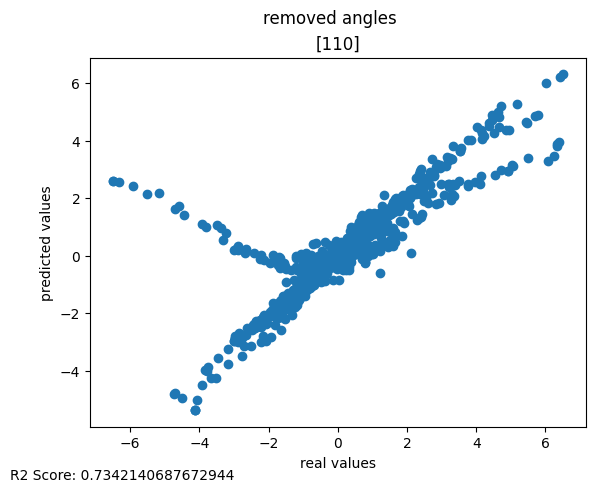

In [22]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.suptitle("removed angles")
plt.title(removed_angles)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [23]:
#model.save('CPL_meV.h5')